In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Load the dataset
plants = pd.read_csv('plants.csv')
print(plants.head())

   height  weight species  light  dead  growth  water  fertilizer
0    15.7     4.7       A   17.8    11    13.0    2.4           1
1    21.5     8.0       A    2.5    27     7.6    5.5           1
2    15.1     3.2       A   19.6    11    17.0    4.4           1
3    11.5     2.7       A    5.7    18    20.0    1.7           1
4    10.4     2.6       A   15.3     9    11.5    3.1           1


In [6]:
def plot_model_comparison(predictor1, predictor2, response, data):
  
  model1 = sm.OLS.from_formula(f'{response} ~ {predictor1} + {predictor2}', data=data).fit()
  print("Coefficients:", model1.params,sep='\n')

  model2 = sm.OLS.from_formula(f'{response} ~ {predictor1} + {predictor2} +{predictor1}:{predictor2}', data=data).fit()
  print("\nCoefficients with interaction term:", model2.params, sep='\n')

  for predictor2_value in data[predictor2].unique():  
     # Create range of predictor1 values
     predictor1_range = np.linspace(data[predictor1].min(), data[predictor1].max(), 100)
    
     # Filter data for a single value of predictor2
     predictor2_data = data[data[predictor2] == predictor2_value]
    
     # Scatter plot of actual data
     plt.scatter(predictor2_data[predictor1], predictor2_data[response], color='green', alpha=0.6, label=f'{predictor2_value} data')
    
     # Prepare prediction input
     prediction_df = pd.DataFrame({predictor1: predictor1_range, predictor2: predictor2_value})
    
     # Model 1 prediction (no interaction)
     pred1 = model1.predict(prediction_df)
     plt.plot(predictor1_range, pred1, 'k--', label='Model 1 (no interaction)')
    
     # Model 2 prediction (with interaction)
     pred2 = model2.predict(prediction_df)
     plt.plot(predictor1_range, pred2, color='black', label='Model 2 (with interaction)')
    
     plt.xlabel(predictor1)
     plt.ylabel(response)
     plt.title(f'Regression Line Comparison for {predictor2_value}')
     plt.legend()
     plt.xlim(data[predictor1].min(), data[predictor1].max())
     plt.ylim(data[response].min(), data[response].max())
     plt.show()

Coefficients:
Intercept       6.953395
species[T.B]    0.714273
weight          1.992474
dtype: float64

Coefficients with interaction term:
Intercept              8.168619
species[T.B]          -3.580515
weight                 1.658621
weight:species[T.B]    1.115071
dtype: float64


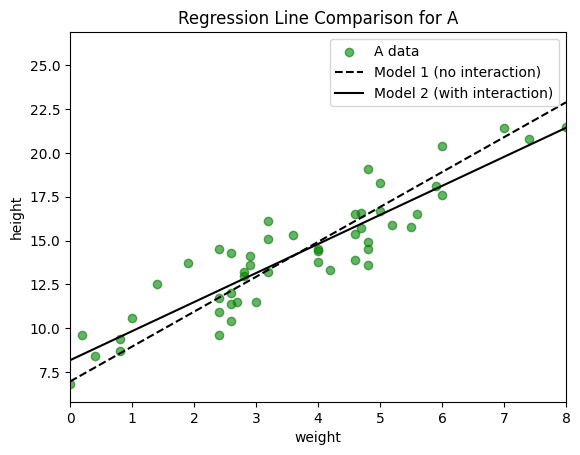

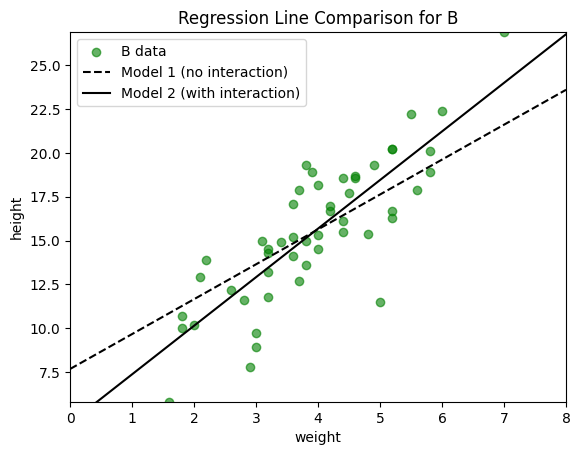

In [7]:
# Compare models predicting 'height' using 'weight','species' without and with interaction
plot_model_comparison('weight','species','height',plants)

Coefficients for growth prediction:
Intercept           5.904379
water               1.860867
fertilizer         -1.196669
water:fertilizer    0.774034
dtype: float64


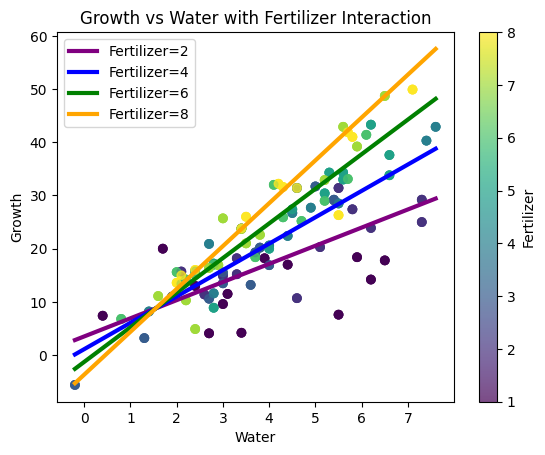

In [8]:
# Fit the regression model for growth based on water, fertilizer, and their interaction
model3 = sm.OLS.from_formula('growth ~ water + fertilizer + water:fertilizer', data=plants).fit()

# Print coefficients of the model
print("Coefficients for growth prediction:")    
print(model3.params)

fertilizer_values = [2, 4, 6, 8]
colors = ['purple', 'blue', 'green', 'orange']
for i, fertilizer in enumerate(fertilizer_values):
    # Create a range of water values
    water_range = np.linspace(plants['water'].min(), plants['water'].max(), 100)
    
    # Prepare prediction input
    prediction_df = pd.DataFrame({'water': water_range, 'fertilizer': fertilizer})
    
    # Model prediction
    pred = model3.predict(prediction_df)
    
    # Plot the regression line for each fertilizer value
    plt.plot(water_range, pred, color=colors[i], label=f'Fertilizer={fertilizer}', linewidth=3)
    plt.scatter(plants['water'], plants['growth'], c=plants['fertilizer'], alpha=0.7)   
    
plt.colorbar().set_label('Fertilizer')
plt.xlabel('Water')
plt.ylabel('Growth')
plt.title('Growth vs Water with Fertilizer Interaction')
plt.legend()
plt.show()